In [2]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from keras import backend as K
from keras.layers import Layer,InputSpec
import keras.layers as kl
from glob import glob
from sklearn.metrics import roc_curve, auc
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from sklearn.metrics import roc_auc_score
from tensorflow.keras import callbacks 
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from  matplotlib import pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.layers import concatenate,Dense, Conv2D, MaxPooling2D, Flatten,Input,Activation,add,AveragePooling2D,GlobalAveragePooling2D,BatchNormalization,Dropout
%matplotlib inline
import shutil
from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report ,confusion_matrix
from tensorflow.python.platform import build_info as tf_build_info
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
tf.random.set_seed(10000)

In [3]:
data_ex = os.listdir('Species/Training_Set/Anthias anthias')
print(data_ex)

['anthias_anthias-0.jpg', 'anthias_anthias-1.jpg', 'anthias_anthias-10.jpg', 'anthias_anthias-100.jpg', 'anthias_anthias-1000.jpg', 'anthias_anthias-1001.jpg', 'anthias_anthias-1002.jpg', 'anthias_anthias-1003.jpg', 'anthias_anthias-1004.jpg', 'anthias_anthias-1005.jpg', 'anthias_anthias-1006.jpg', 'anthias_anthias-1007.jpg', 'anthias_anthias-1008.jpg', 'anthias_anthias-1009.jpg', 'anthias_anthias-101.jpg', 'anthias_anthias-1010.jpg', 'anthias_anthias-1011.jpg', 'anthias_anthias-1012.jpg', 'anthias_anthias-1013.jpg', 'anthias_anthias-1014.jpg', 'anthias_anthias-1015.jpg', 'anthias_anthias-1016.jpg', 'anthias_anthias-1017.jpg', 'anthias_anthias-1018.jpg', 'anthias_anthias-1019.jpg', 'anthias_anthias-102.jpg', 'anthias_anthias-1020.jpg', 'anthias_anthias-1021.jpg', 'anthias_anthias-1022.jpg', 'anthias_anthias-1023.jpg', 'anthias_anthias-1024.jpg', 'anthias_anthias-1025.jpg', 'anthias_anthias-1026.jpg', 'anthias_anthias-1027.jpg', 'anthias_anthias-1028.jpg', 'anthias_anthias-1029.jpg', 'a

In [5]:
train_dir = os.listdir('Species/Training_Set/')
test_dir = os.listdir('Species/Test_Set/')

In [6]:
len(train_dir)

20

In [7]:
len(test_dir)

20

In [8]:
targetnames = train_dir
print(targetnames)

['Anthias anthias', 'Atherinomorus lacunosus', 'Belone belone', 'Boops boops', 'Chlorophthalmus agassizi', 'Coris julis', 'Dasyatis centroura', 'Epinephelus caninus', 'Gobius niger', 'Mugil cephalus', 'Phycis phycis', 'Polyprion americanus', 'Pseudocaranx dentex', 'Rhinobatos cemiculus', 'Scomber japonicus', 'Solea solea', 'Squalus acanthias', 'Tetrapturus belone', 'Trachinus draco', 'Trigloporus lastoviza']


In [9]:
# def toRgb(image):
#     image_rgb = cv2.cvtColor(image, cv2.COLOR_RGBA2RGB)
#     image_rgb = np.array(image_rgb,dtype=np.float32)
#     return image_rgb

In [10]:
# Augmenting images and storing them in temporary directories 
for img_class in targetnames:

    #creating temporary directories
    # creating a base directory
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    # creating a subdirectory inside the base directory for images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    img_list = os.listdir('Species/Converted_Images/' + img_class)

    # Copy images from the class train dir to the img_dir 
    for file_name in img_list:

        # path of source image in training directory
        source = os.path.join('Species/Converted_Images/' + img_class, file_name)

        # creating a target directory to send images 
        target = os.path.join(img_dir, file_name)

        # copying the image from the source to target file
        shutil.copyfile(source, target)

    # Temporary augumented dataset directory.
    source_path = aug_dir

    # Augmented images will be saved to training directory
    save_path = 'Species/Converted_Images/' + img_class

    # Creating Image Data Generator to augment images
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
#         preprocessing_function=toRgb,
        fill_mode='nearest'
    )

    batch_size = 50

    aug_datagen = datagen.flow_from_directory(source_path,
                                              save_to_dir=save_path,save_format='jpg',
                                              target_size=(224, 224),
                                              batch_size=batch_size
                                             )
    
    # Generate the augmented images
    aug_images = 8000 

    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((aug_images - num_files) / batch_size))

    # creating 8000 augmented images per class
    for i in range(0, num_batches):
        images, labels = next(aug_datagen)
    # delete temporary directory 
    shutil.rmtree('aug_dir')

Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.
Found 1700 images belonging to 1 classes.


In [9]:
train_path = 'Species/Training_Set/'
test_path = 'Species/Test_Set/'
batch_size=16

In [10]:
datagen=ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input)

In [11]:
image_size = 224
print("\nTrain Batches: ")
train_batches = datagen.flow_from_directory(directory=train_path,
                                            target_size=(image_size,image_size),
                                            batch_size=batch_size,
                                            shuffle=True)

print("\nTest Batches: ")
test_batches =datagen.flow_from_directory(test_path,
                                           target_size=(image_size,image_size),
                                           batch_size=batch_size,
                                           shuffle=False)


Train Batches: 
Found 34000 images belonging to 20 classes.

Test Batches: 
Found 6000 images belonging to 20 classes.


In [12]:
resnet = tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)

# Exclude the last 3 layers of the model.
conv = resnet.layers[-3].output

In [13]:
# output = resnet.output
# output = Dense(20, activation='softmax', name='Softmax')(output)
# model = Model(inputs=resnet.input, outputs=output)

output = GlobalAveragePooling2D()(conv)
output = Dense(20, activation='softmax', name='SoftMax')(output)
model = Model(inputs=resnet.input, outputs=output)

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [15]:
opt1=tf.keras.optimizers.Adam(learning_rate=0.01,epsilon=0.1)
model.compile(optimizer=opt1,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
class_weights = {   
                    0: 1.0,  # Anthias anthias
                    1: 1.0,  # Atherinomorus Laconusus
                    2: 1.0,  # Belone belone
                    3: 1.0,  # Boops boops
                    4: 1.0,  # Chlorophthalmus agassizi
                    5: 1.0,  # Coris julis
                    6: 1.0,  # Dasyatis centroura
                    7: 1.0,  # Epinephelus caninus
                    8: 1.0,  # Gobius niger
                    9: 1.0,  # Mugil cephalus
                    10: 1.0,  # Phycis phycis
                    11: 1.0,  # Polyprion americanus
                    12: 1.0,  # Pseudocaranx dentex
                    13: 1.0,  # Rhinobatos cemiculus
                    14: 1.0,  # Scomber japonicus
                    15: 1.0,  # Solea solea
                    16: 1.0,  # Squalus acanthias
                    17: 1.0,  # Tetrapturus belone
                    18: 1.0,  # Trachinus draco
                    19: 1.0,  # Trigloporus lastoviza
                }


checkpoint=  ModelCheckpoint(filepath = 'ResNet50-AdamNonAugmented.hdf5',monitor='accuracy',save_best_only=True,save_weights_only=True)

In [17]:
Earlystop = EarlyStopping(monitor='accuracy', mode='min',patience=40, min_delta=0.001)
history = model.fit(train_batches,
                    steps_per_epoch=len(test_batches),
                    epochs=100,
                    verbose=1,
#                     validation_data=test_batches,
#                     validation_steps=len(test_batches)/batch_size,
                    callbacks=[checkpoint,Earlystop],
                    class_weight=class_weights
                   )
print('Done Training')

Epoch 1/100
375/375 [==============================] - 107s 265ms/step - loss: 1.0912 - accuracy: 0.6775
Epoch 2/100
375/375 [==============================] - 99s 263ms/step - loss: 0.5800 - accuracy: 0.8328
Epoch 3/100
375/375 [==============================] - 98s 261ms/step - loss: 0.4190 - accuracy: 0.8730
Epoch 4/100
375/375 [==============================] - 98s 262ms/step - loss: 0.3193 - accuracy: 0.9005
Epoch 5/100
375/375 [==============================] - 99s 263ms/step - loss: 0.2737 - accuracy: 0.9108
Epoch 6/100
375/375 [==============================] - 98s 261ms/step - loss: 0.2090 - accuracy: 0.9337
Epoch 7/100
375/375 [==============================] - 98s 261ms/step - loss: 0.1774 - accuracy: 0.9453
Epoch 8/100
375/375 [==============================] - 98s 262ms/step - loss: 0.1297 - accuracy: 0.9598
Epoch 9/100
375/375 [==============================] - 98s 260ms/step - loss: 0.0898 - accuracy: 0.9727
Epoch 10/100
375/375 [==============================] - 98s 260

In [18]:
from tensorflow.keras import models
model.load_weights("ResNet50-AdamNonAugmented.hdf5")

In [19]:
predictions = model.predict(test_batches, steps=6000/batch_size, verbose=1) #6000 adalah jumlah dataset untuk test

375/375 [==============================] - 55s 144ms/step


In [20]:
#geting predictions on test dataset
y_pred = np.argmax(predictions, axis=1)
#getting the true labels per image 
y_true = test_batches.classes
#getting the predicted labels per image 
y_prob=predictions
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_true)

# Creating classification report 
report = classification_report(y_pred,y_true, target_names=targetnames)

print("\nClassification Report:")
print(report)


Classification Report:
                          precision    recall  f1-score   support

         Anthias anthias       1.00      1.00      1.00       300
 Atherinomorus lacunosus       1.00      1.00      1.00       300
           Belone belone       1.00      1.00      1.00       300
             Boops boops       1.00      1.00      1.00       300
Chlorophthalmus agassizi       1.00      1.00      1.00       300
             Coris julis       1.00      1.00      1.00       300
      Dasyatis centroura       1.00      1.00      1.00       300
     Epinephelus caninus       0.99      1.00      0.99       296
            Gobius niger       0.99      1.00      1.00       298
          Mugil cephalus       1.00      1.00      1.00       300
           Phycis phycis       1.00      1.00      1.00       300
    Polyprion americanus       1.00      0.99      0.99       304
     Pseudocaranx dentex       1.00      1.00      1.00       300
    Rhinobatos cemiculus       1.00      0.99      

In [21]:
print("Precision: "+ str(precision_score(y_true, y_pred, average='weighted')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='weighted')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("weighted Roc score: " + str(roc_auc_score(y_test,y_prob,multi_class='ovr',average='weighted')))

Precision: 0.9980120868550554
Recall: 0.998
Accuracy: 0.998
weighted Roc score: 0.9999954678362574


In [22]:
print("Precision: "+ str(precision_score(y_true, y_pred, average='macro')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='macro')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
print("Macro Roc score: " + str(roc_auc_score(y_test,y_prob,multi_class='ovr',average='macro')))

Precision: 0.9980120868550554
Recall: 0.9979999999999999
Accuracy: 0.998
Macro Roc score: 0.9999954678362574


In [23]:
print("Precision: "+ str(precision_score(y_true, y_pred, average='micro')))
print("Recall: "+ str(recall_score(y_true, y_pred, average='micro')))
print("Accuracy: " + str(accuracy_score(y_true, y_pred)))
tpr={}
fpr={}
roc_auc={}
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print("Micro Roc score: " + str(roc_auc["micro"]))

Precision: 0.998
Recall: 0.998
Accuracy: 0.998
Micro Roc score: 0.9999971081871344


In [24]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(20):
    r = roc_auc_score(y_test[:, i], y_prob[:, i])
    print("The ROC AUC score of "+targetnames[i]+" is: "+str(r))

The ROC AUC score of Anthias anthias is: 1.0
The ROC AUC score of Atherinomorus lacunosus is: 0.9999994152046784
The ROC AUC score of Belone belone is: 1.0
The ROC AUC score of Boops boops is: 0.9999994152046784
The ROC AUC score of Chlorophthalmus agassizi is: 1.0
The ROC AUC score of Coris julis is: 1.0
The ROC AUC score of Dasyatis centroura is: 1.0
The ROC AUC score of Epinephelus caninus is: 0.9999467836257311
The ROC AUC score of Gobius niger is: 0.9999988304093567
The ROC AUC score of Mugil cephalus is: 0.9999994152046784
The ROC AUC score of Phycis phycis is: 1.0
The ROC AUC score of Polyprion americanus is: 0.9999672514619884
The ROC AUC score of Pseudocaranx dentex is: 1.0
The ROC AUC score of Rhinobatos cemiculus is: 0.9999988304093567
The ROC AUC score of Scomber japonicus is: 0.9999994152046783
The ROC AUC score of Solea solea is: 1.0
The ROC AUC score of Squalus acanthias is: 1.0
The ROC AUC score of Tetrapturus belone is: 1.0
The ROC AUC score of Trachinus draco is: 1.0


In [25]:
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = dict()
for i in range(20):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i], drop_intermediate=False)
    roc_auc[i] = auc(fpr[i], tpr[i])

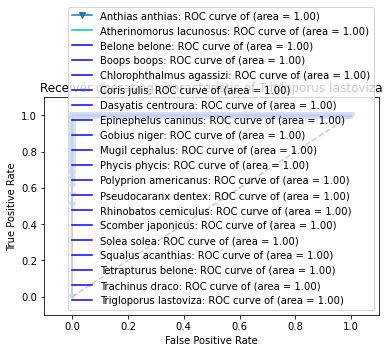

In [26]:
plt.plot(fpr[0], tpr[0],'v-',label='Anthias anthias: ROC curve of (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],'c',label='Atherinomorus lacunosus: ROC curve of (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2],'b',label='Belone belone: ROC curve of (area = %0.2f)' % roc_auc[2])
plt.plot(fpr[3], tpr[3],'b',label='Boops boops: ROC curve of (area = %0.2f)' % roc_auc[3])
plt.plot(fpr[4], tpr[4],'b',label='Chlorophthalmus agassizi: ROC curve of (area = %0.2f)' % roc_auc[4])
plt.plot(fpr[5], tpr[5],'b',label='Coris julis: ROC curve of (area = %0.2f)' % roc_auc[5])
plt.plot(fpr[6], tpr[6],'b',label='Dasyatis centroura: ROC curve of (area = %0.2f)' % roc_auc[6])
plt.plot(fpr[7], tpr[7],'b',label='Epinephelus caninus: ROC curve of (area = %0.2f)' % roc_auc[7])
plt.plot(fpr[8], tpr[8],'b',label='Gobius niger: ROC curve of (area = %0.2f)' % roc_auc[8])
plt.plot(fpr[9], tpr[9],'b',label='Mugil cephalus: ROC curve of (area = %0.2f)' % roc_auc[9])
plt.plot(fpr[10], tpr[10],'b',label='Phycis phycis: ROC curve of (area = %0.2f)' % roc_auc[10])
plt.plot(fpr[11], tpr[11],'b',label='Polyprion americanus: ROC curve of (area = %0.2f)' % roc_auc[11])
plt.plot(fpr[12], tpr[12],'b',label='Pseudocaranx dentex: ROC curve of (area = %0.2f)' % roc_auc[12])
plt.plot(fpr[13], tpr[13],'b',label='Rhinobatos cemiculus: ROC curve of (area = %0.2f)' % roc_auc[13])
plt.plot(fpr[14], tpr[14],'b',label='Scomber japonicus: ROC curve of (area = %0.2f)' % roc_auc[14])
plt.plot(fpr[15], tpr[15],'b',label='Solea solea: ROC curve of (area = %0.2f)' % roc_auc[15])
plt.plot(fpr[16], tpr[16],'b',label='Squalus acanthias: ROC curve of (area = %0.2f)' % roc_auc[16])
plt.plot(fpr[17], tpr[17],'b',label='Tetrapturus belone: ROC curve of (area = %0.2f)' % roc_auc[17])
plt.plot(fpr[18], tpr[18],'b',label='Trachinus draco: ROC curve of (area = %0.2f)' % roc_auc[18])
plt.plot(fpr[19], tpr[19],'b',label='Trigloporus lastoviza: ROC curve of (area = %0.2f)' % roc_auc[19])

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of %s'%targetnames[i])
plt.legend(loc="lower right")
plt.show()

In [27]:
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
import numpy as np

label =  ['Anthias anthias','Atherinomorus lacunosus','Belone belone','Boops boops','Chlorophthalmus agassizi',
               'Coris julis','Dasyatis centroura','Epinephelus caninus','Gobius niger','Mugil cephalus','Phycis phycis',
              'Polyprion americanus','Pseudocaranx dentex','Rhinobatos cemiculus','Scomber japonicus','Solea solea',
               'Squalus acanthias','Tetrapturus belone','Trachinus draco','Trigloporus lastoviza']


def plot_confusion_matrix(y_true, y_pred, classes, normalize=True,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    cm2 = cm.astype('float') / cm.sum(axis=0)[:, np.newaxis]
    cm2 = cm2 * 100
    print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm2, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm2.shape[1]),
           yticks=np.arange(cm2.shape[0]),
           xticklabels=label, yticklabels=label,
           title=title,
           ylabel='Predicted label',
           xlabel='True label')

    plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            z = cm[i, j]
            z = np.around(z)

            ax.text(j, i, format(z),
                    ha="center", va="center",
                    color="white" if i == j else "black")
    fig.tight_layout()
    return ax

#label nya ganti angka saja buat pengertian

[[300   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0 299   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0 300   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   0 299   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 300   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0 300   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 300   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 296   0   0   0   4   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 298   0   0   0   0   0   0   1   0   0
    0   1]
 [  0   0   0   0   0   0   0   0   0 299   0   0   0   0   1   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 300   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 300   0   0   0   0

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='True label', ylabel='Predicted label'>

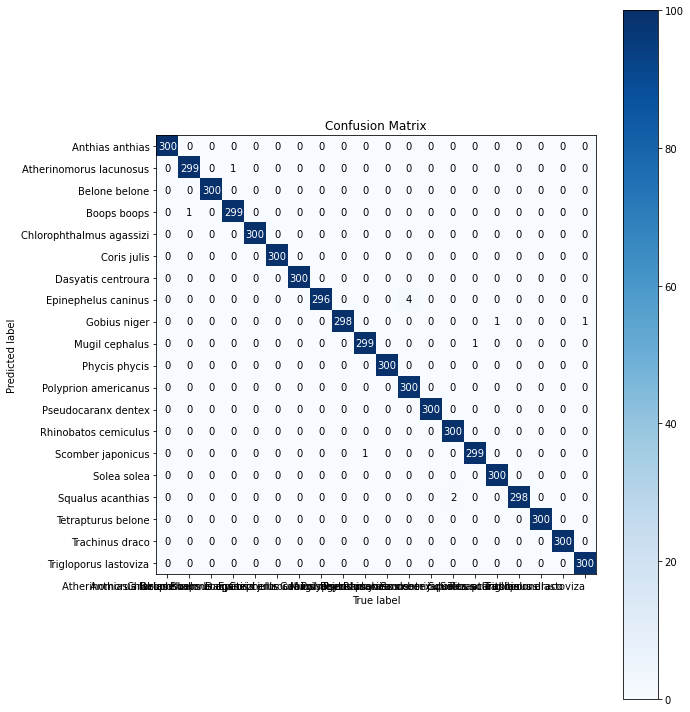

In [28]:
plot_confusion_matrix(y_true,y_pred,label)